# Критерии согласия

В Python, как и в любых других статистических пакетах, уже реализованы многие критерии, которые мы изучали. Давайте посмотрим, как применять эти критерии на практике.

In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter("ignore")

In [2]:
np.random.seed(123)

## Критерий Колмогорова-Смирнова

Начнем с критерия согласия Колмогорова. Этот критерий проверяет простую гипотезу о принадлежности выборки некоторому (непрерывному!) закону распределения. Критерий Колмогорова реализован с помощью функции `kstest` в модуле `stats`:

`stats.kstest(sample, cdf)`

- `sample` — реализация нашей выборки
- `cdf` — функция распределения закона, с которым сравниваем.

Критерий Колмогорова-Смирнова сравнивает функции кумулятивных распределений (cdf) двух выборочных распределений и оценивает, насколько они похожи.

Если две выборки взяты из одного и того же распределения, диапазоны значений $x$ должны в значительной степени перекрываться.

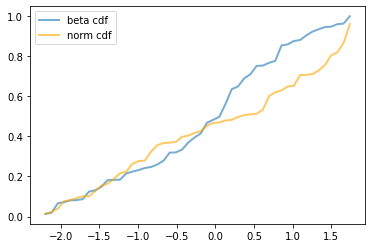

In [3]:
from scipy.stats import norm, beta
fig, ax = plt.subplots(1, 1)
x = beta.rvs(2, 2, size=50) # beta distribution
x2 = norm.rvs(size=50) # normal distribution
vals = np.linspace(min([x.min(),x2.min()]), max([x.max(),x2.max()]), 50)
ax.plot(vals, beta.cdf(sorted(x), 2, 2), lw=2, alpha=0.6, label='beta cdf')
ax.plot(vals, norm.cdf(sorted(x2)), color='orange', lw=2, alpha=0.6, label='norm cdf')
plt.legend();

Критерий Колмогорова-Смирнова количественно определяет разницу между двумя вероятностынми распределениями по максимальному промужутку $y$-расстояния между двумя функциями кумулятивного распределения.

In [6]:
n = 500 # размер выборки

In [7]:
sample1 = np.random.rand(n) # выборка 1 из равномерного распределения на [0,1]
sample2 = np.random.beta(2,2, size=n) # выборка 2 из бета-распределения с параметрами (2,2)

Давайте сначала посмотрим на гистограммы для `sample1` и `sample2`

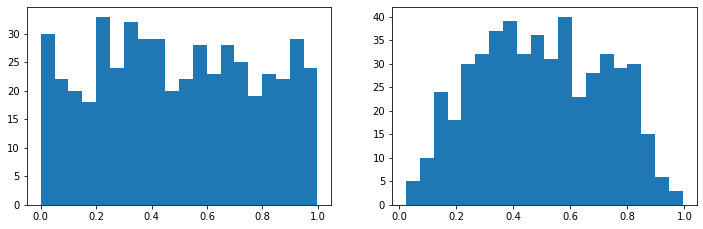

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(sample1, bins=20)
plt.subplot(2,2,2)
plt.hist(sample2, bins=20)
plt.show()

Запускаем критерий Колмогорова для `sample1`, проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1]. Должны получить большой `p-value` (что будет означать, что значение статистики попало в область вероятных значений).

In [8]:
stats.kstest(sample1, stats.uniform.cdf)

KstestResult(statistic=0.02977893867201975, pvalue=0.7553346739924274)

Запускаем критерий Колмогорова для `sample2`, проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1]. Должны получить малый `p-value` (что будет означать, что значение статистики попало в область маловероятных значений).

In [9]:
stats.kstest(sample2, stats.uniform.cdf)

KstestResult(statistic=0.109059197161369, pvalue=1.2372423114520465e-05)

Запускаем критерий Колмогорова для `sample1`, проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2). Обратите внимание на то, как передавать параметры для функции плотности.

In [10]:
stats.kstest(sample1, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.09860184733194155, pvalue=0.00011034826529907896)

Запускаем критерий Колмогорова для `sample2`, проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2).

In [11]:
stats.kstest(sample2, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.023712619065139495, pvalue=0.9348640500106189)

## Критерий $\chi^2$

Статистика $\chi^2$ — метрический показатель, который измеряет степень, с которой наблюдаемые данные отступают от ожидания.

Этот критерий реализован с помощью функции `chisquare` в модуле `stats`:
    
`stats.chisquare(obs, exp)`

- `obs` — количества попаданий в каждую "ячейку"
- `exp` — ожидаемые количества попаданий в каждую "ячейку".

Обратите внимание на то, что мы передаем в функцию `chisquare` не вероятности (эмпирические и истинные), а количества!

В экспериментах с селекцией гороха Мендель наблюдал частоты различных видов семян, получаемых при скрещивании растений с круглыми желтыми семенами и растений с морщинистыми зелеными семенами. Эти данные и значения теоретических вероятностей, определяемые в соответствии с законом Менделя, приведены в следующей таблице:

| Тип семян            | Частота | Вероятность |
|:-------------------- |--------:| -----------:|
| Круглые и желтые     | 315/556 | 9/16        |
| Морщинистые и желтые | 101/556 | 3/16        |
| Круглые и зеленые    | 108/556 | 3/16        |
| Морщинистые и зеленые| 32/556  | 1/16        |

Необходимо проверить гипотезу $H_0$ о согласованности частот с теоретическими вероятностями при помощи критерия хи-квадрат.

In [331]:
# занесем данные из таблицы в массивы

obs = np.array([315/556, 101/556, 108/556, 32/556])
exp = np.array([9/16, 3/16, 3/16, 1/16])

In [332]:
# вспомним о том, что в функцию chisquare мы должны передавать количества, а не частоты

obs = obs * 556
exp = exp * 556

Статистика $\chi^2$ задается как сумма квадратических остатков Пирсона:
$$\chi^2 = \sum_{i}^{r}\sum_{j}^{c}{R^2}$$
где $r$ и $c$ — соответственно число строк и столбцов.

Остаток Пирсона задается формулой: R = (наблюдаемое - ожидаемое) / ожидаемое ** 0.5

In [334]:
(((obs - exp) / np.sqrt(exp)) ** 2).sum()

0.47002398081534874

In [335]:
stats.chisquare(obs, exp)

Power_divergenceResult(statistic=0.4700239808153487, pvalue=0.9254258951036157)

## Проверка нормальности

Очень важный тип критериев согласия — это проверка нормальности. На лекции мы изучали следующие методы: 

1. `qqplot(sample, dist, line='r')` — построение квантильного графика (Q-Q Plot) — визуальная проверка любого критерия согласия о масштабе/сдвиге. Аргументы: `sample` — наша выборка, `dist` — распределение, с которым сравниваем (если этот параметр не указан, то используется нормальное распределение), `line='r'` — подгоняет прямую под облако точек, чтобы было проще визуально сравнивать.
2. `stats.shapiro(sample)` — критерий Шапиро-Уилка. Аргументы: `sample` — наша выборка.
3. `stats.jarque_bera(sample)` — критерий Харке-Бера. Аргументы: `sample` — наша выборка.

In [15]:
# поменяем размер выборки, если нужно
n = 500

In [16]:
sample1 = np.random.normal(1,2, size=n) # выборка из нормального распределения
sample2 = np.random.beta(2,2, size=n) # выборка из бета-распределения с параметрами (2,2)

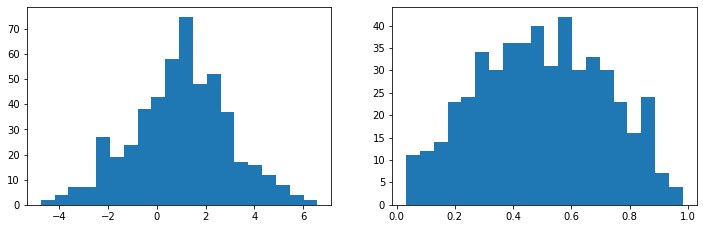

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.hist(sample1, bins=20)
plt.subplot(2,2,2)
plt.hist(sample2, bins=20)
plt.show()

### Квантиль-квантильный график

Квантиль-квантильный график используется, чтобы визуально определить, насколько близко выборка находится от нормального распределения. QQ-график упорядочивает $z$-оценки снизу вверх и графически отображает $z$-оценки каждого значения на оси $y$; ось $x$ — это соответствующий квантиль нормального распределения для ранга конкретного значения. Поскольку данные нормализованы, единицы соответствуют числу стандартных отклонений данных от среднего. Если точки примерно ложатся на диагональную линию, то распределение выборки можно рассматривать близким к нормальному. 

In [18]:
from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

/Users/popov/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


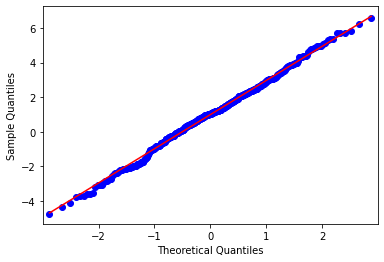

In [21]:
# график квантилей для sample1
qqplot(sample1, line='s')
plt.show()

/Users/popov/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


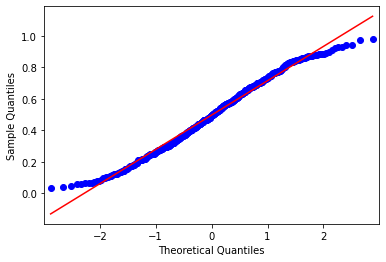

In [22]:
# график квантилей для sample2
qqplot(sample2, line='s')
plt.show()

In [23]:
# запускаем критерий Шапиро-Уилка для sample1
stats.shapiro(sample1)

ShapiroResult(statistic=0.9959383010864258, pvalue=0.2265419065952301)

In [24]:
# запускаем критерий Шапиро-Уилка для sample2
stats.shapiro(sample2)

ShapiroResult(statistic=0.9849844574928284, pvalue=4.944821193930693e-05)

In [25]:
# запускаем критерий Харке-Бера для sample1
stats.jarque_bera(sample1)

Jarque_beraResult(statistic=0.5047526531339083, pvalue=0.7769522952554369)

In [26]:
# запускаем критерий Харке-Бера для sample2
stats.jarque_bera(sample2)

Jarque_beraResult(statistic=13.737779567593636, pvalue=0.001039630638919098)

# Проверка однородности. Независимые выборки

***
В файле aggress.xls содержаться бальные оценки агресивности детей 4-х лет, проявленной в течении 15-ти минут после игры. Первые 12 детей — мальчики, остальные 12 детей — девочки. Необходимо проверить гипотезу однородности мальчиков и девочек.

In [6]:
data = pd.read_excel('aggress.xls')

In [15]:
data.head()

,GENDER,AGGRESSN
0,BOYS,86
1,BOYS,69
2,BOYS,72
3,BOYS,65
4,BOYS,113


Перед анализом данных полезно визулизировать данные. Это позволит получить какой-то априорный вывод о данных и избежать ошибок в дальнейшем (например, при вызове функций с неправильными альтернативами).Для визуализации различий лучше всего использовать "ящик с усами" (boxplot)

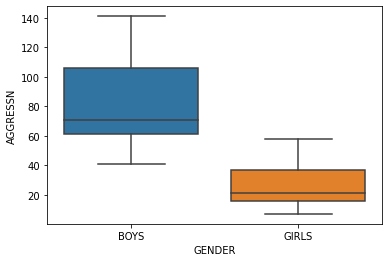

In [22]:
sns.boxplot(x='GENDER', y='AGGRESSN', data=data);

Теперь извлечем разделим данные для мальчиков и девочек. Преобразовывать в numpy array здесь вовсе не обязательно (это удобно только при оценке параметра сдвига).

In [7]:
sample1 = data[data['GENDER'] == 'BOYS']['AGGRESSN'].to_numpy()
sample2 = data[data['GENDER'] == 'GIRLS']['AGGRESSN'].to_numpy()

### Критерий Колмогорова-Смирнова
Начнем с критерия Колмогорова-Смирнова. Этот критерий проверяет простую гипотезу о равенстве двух (непрерывных!) функций распределения, из которых получены выборки, против любой альтернативы. 

`stats.ks_2samp(sample1, sample2, alternative)` — тут `sample1` и `sample2` — реализации первой и второй выборки, а `alternative` — альтернатива, которая используется. По умолчанию `alternative='two-sided'`; другие варианты: `less` и `greater`.

Обратите внимание, что альтернатива формулируется для функций распределений, то есть если мы хотим проверить одностороннюю гипотезу о том, что вторая выборка стохастически принимает большие значения, необходимо использовать `alternative='less'`.

In [24]:
stats.ks_2samp(sample1, sample2)

KstestResult(statistic=0.8333333333333334, pvalue=0.00020413023508998745)

In [25]:
stats.ks_2samp(sample1, sample2, alternative='less')

KstestResult(statistic=0.8333333333333334, pvalue=0.00010206511754499368)

In [26]:
stats.ks_2samp(sample1, sample2, alternative='greater')

KstestResult(statistic=0.0, pvalue=1.0)

А можно ли применять критерий Колмогорова-Смирнова для этих данных? Ответ: скорее нет, чем да (данные дискретны).

### Критерий Манна-Уитни
Перейдем к критерию Манна-Уитни. Этот критерий проверяет простую гипотезу о равенстве двух функций распределений, из которых получены выборки, против альтернативы доминирования (!). Он реализован с помощью функции `mannwhitneyu` в модуле `stats`:

`tats.mannwhitneyu(sample1, sample2, alternative)` — тут `sample1` и `sample2` — реализации первой и второй выборки, а `alternative` — альтернатива, которая используется. По умолчанию `alternative=None`; другие варианты: `two-sided`, `less` и `greater`. 

Официальная документация говорит, что `alternative=None` оставлена только для совместимости со старыми версиями реализации этого критерия.

Правильно, конечно, использовать односторонние версии критерия Манна-Уитни. Обратите внимание, что в отличие от критерия Колмогорова, тут альтернатива формулируется уже для выборок, то есть если мы хотим проверить одностороннюю гипотезу о том, что вторая выборка стохастически принимает большие значения, необходимо использовать `alternative='greater'`.

In [27]:
stats.mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=6.0, pvalue=7.738460169928243e-05)

In [28]:
stats.mannwhitneyu(sample1, sample2, alternative='two-sided')

MannwhitneyuResult(statistic=138.0, pvalue=0.00015476920339856486)

In [29]:
stats.mannwhitneyu(sample1, sample2, alternative='greater')

MannwhitneyuResult(statistic=138.0, pvalue=7.738460169928243e-05)

In [30]:
stats.mannwhitneyu(sample1, sample2, alternative='less')

MannwhitneyuResult(statistic=138.0, pvalue=0.9999387453412919)

### Критерий Стьюдента ($t$-тест)

Мы еще изучали параметрические критерии Стьюдента для независимых выборок ($Z$-критерий и $t$-критерий). Эти критерии проверяют простую гипотезу о равенстве средних двух нормальных распределений против любой альтернативы. $Z$-критерий мы не будем рассматривать, так как для него необходимо знать дисперсию (которая никогда не является известной). А $t$-критерий частично реализован с помощью функции `ttest_ind`:

`stats.ttest_ind(sample1, sample2, equal_var)` — $t$-критерий для случая независимых выборок. Тут `sample1` и `sample2` — реализации первой и второй выборки, а `equal_var` булевая переменная, которая связана с предположением равенства дисперсии. По умолчанию она принимает значение True, но лучше использовать False, чтобы запускался аппроксимационный критерий (Уэлча), а не точный (Стьюдента).

Различные альтернативы, к сожалению, пока не реализованы. 

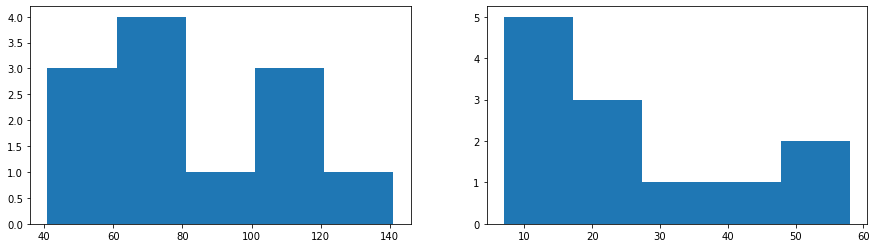

In [10]:
# посмотрим на гистограмму
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 
ax1.hist(sample1, bins=5)
ax2.hist(sample2, bins=5)
plt.show()

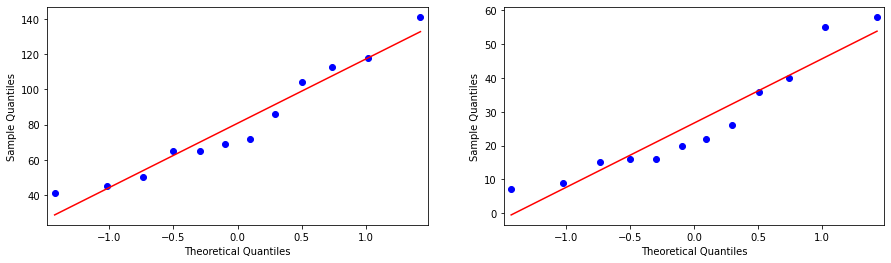

In [23]:
# посмотрим на qqplot
from statsmodels.graphics.gofplots import qqplot

_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 
qqplot(sample1, line='r', ax=ax1)
qqplot(sample2, line='r', ax=ax2);

Конечно, ни о какой нормальности в этих данный и не идет речь. Тем не менее попробуем применить критерий Стьюдента.

In [24]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=5.192725143888218, pvalue=3.3078399999803046e-05)

### Оценка параметра "сдвига"
С помощью "ящиков с усами" мы заметили, что после игры агресивность мальчиков больше, чем у девочек. С помощью критериев однородности, мы убедились, что эти различия значимы. Теперь давайте ответим на вопрос: а на сколько в среднем агресивность мальчиков больше, чем у девочек? Для этого лучше всего использовать медиану попарных разностей.

In [26]:
np.median([[sample1[i] - sample2[j] for j in range(len(sample2))] for i in range(len(sample1))]) 

50.0

## Вместо заключения

В статистике известно большое количество критериев согласия и далеко не все из них реализованы в Python. О критериях можно почитать в книге А.И. Кобзарь "Прикладная математическая статистика. Для инженеров и научных работников". (Почти) полный список того, что реализовано в Python можно найти в официальной документации: https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats.

Если в официальной документации Вы не найдете нужного критерия, гуглите. Вполне возможно, что критерий, который Вам нужен уже реализован.